In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

In [37]:
dir()

['Boston',
 'In',
 'MS',
 'Out',
 'VIF',
 'X',
 '_',
 '_10',
 '_11',
 '_12',
 '_13',
 '_14',
 '_15',
 '_18',
 '_20',
 '_24',
 '_25',
 '_3',
 '_4',
 '_6',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abline',
 'anova_lm',
 'ax',
 'design',
 'exit',
 'get_ipython',
 'load_data',
 'model',
 'newX',
 'new_df',
 'new_preds',
 'np',
 'open',
 'pd',
 'plt',
 'poly',
 'quit',
 'results',
 'sm',
 'summarize',
 'y']

In [38]:
Boston = load_data('Boston') # Contains housing data for 506 neighbourhoods in Boston
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [39]:
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]), 'lstat' : Boston['lstat']})
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [40]:
y = Boston['medv'] # The median value
model = sm.OLS(y, X) # Specifies the model
results = model.fit() # Fits the model

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        11:06:18   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

In [42]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X.head()

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [43]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [44]:
new_df = pd.DataFrame({'lstat' : [5,10,15]})
newX = design.transform(new_df)
newX.head()

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [45]:
new_preds = results.get_prediction(newX)
new_preds.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [46]:
new_preds.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [47]:
def abline(ax, b, m):
    # ax is an axis object for an existing plot, b is the intercept and m is the slope
    # Add a line with a slope m and intercept b to ax
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, 'r--', linewidth=3)

/var/folders/ww/fq7r7t_57x3fk1xnj_kgz03h0000gn/T/ipykernel_91272/3875773209.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1])


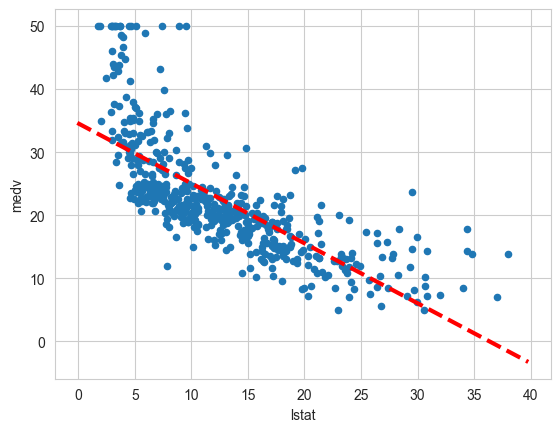

In [48]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1])

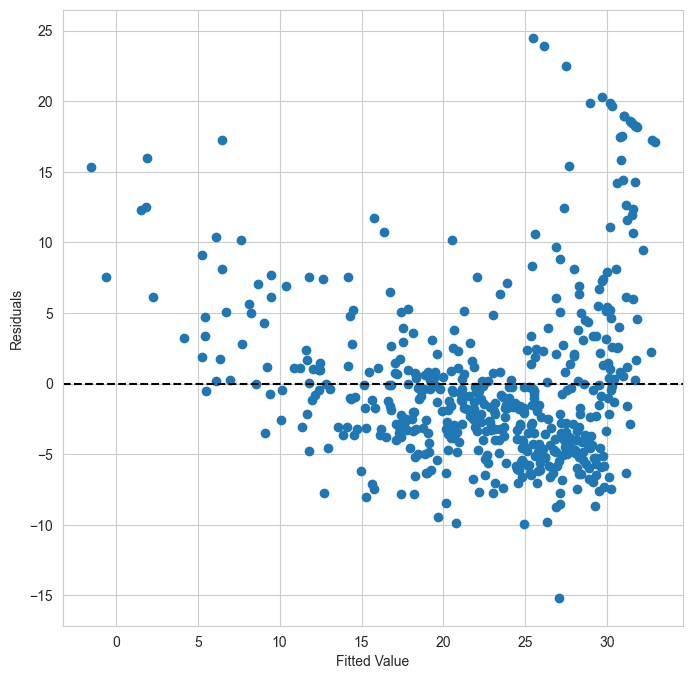

In [49]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--') # Added horizontal line at 0, color 'c' is black, linestyle 'ls' is dashed

np.int64(374)

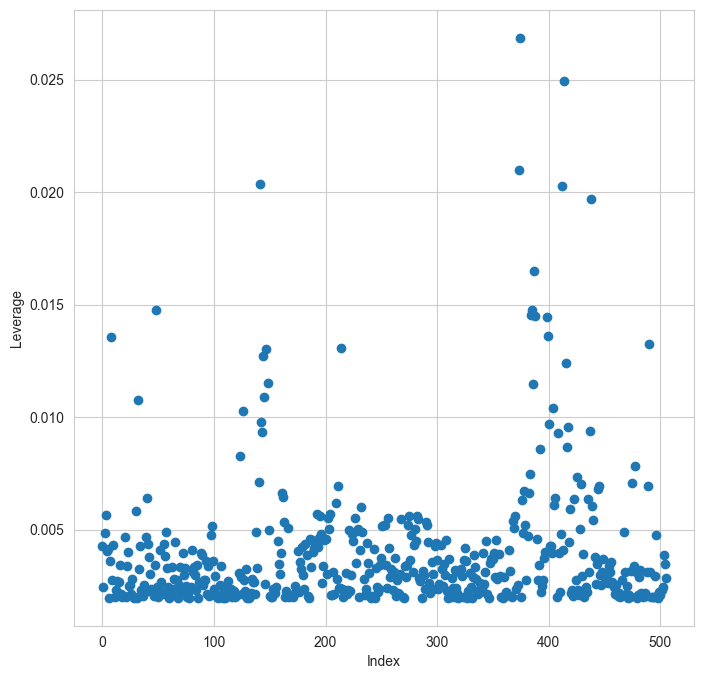

In [51]:
infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # Identifies index of the largest element of an array

# Multiple Linear Regression

In [52]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [55]:
terms = Boston.columns.drop('medv') # Everything but median value
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# Can also remove other less important variables

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [56]:
# R squared value
results.rsquared

np.float64(0.7343070437613077)

In [57]:
# Relative Standard Error
np.sqrt(results.scale)

np.float64(4.798034335596366)

In [60]:
# Variance Inflation Factors
vals = [VIF(X, i) for i in range(1, X.shape[1])] # Easier than creating array, then doing a for loop
vif = pd.DataFrame({'vif' : vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [63]:
# Interaction Terms - created between 'lstat' and 'age'
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


By default, poly() creates a basis matrix for inclusion in the model matrix whose columns are orthogonal polynomials, which are designed for stable least squares computations

In [64]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston) # Specifies that columns representing polynomial functions of its first argument are added to the model matrix.
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [65]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


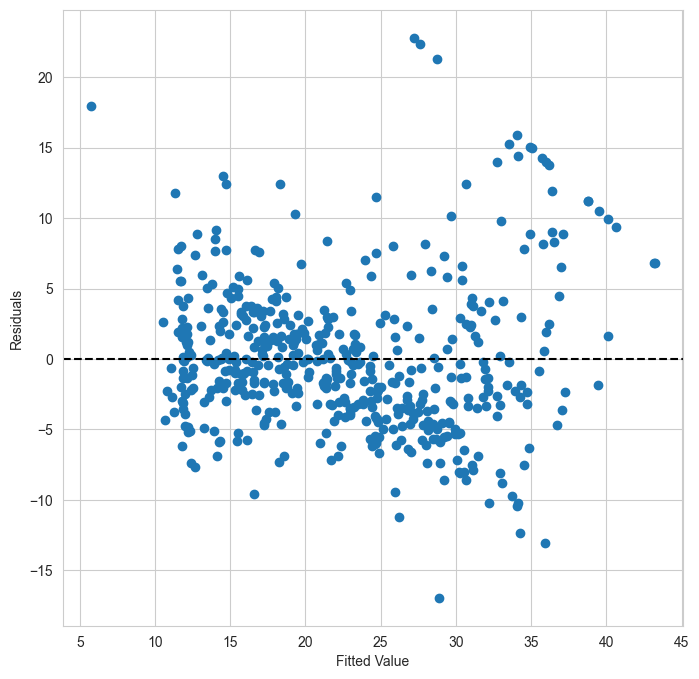

In [66]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residuals')
ax.axhline(0, c='k', ls='--')